# Introduction
The dataset named 'Personal Key Indicators of Heart Disease' will be used for this analysis. It was collected from kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. The dataset Originally, the dataset came from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. However, the dataset that I'm using for this project was uploaded by Kamil Pytlak to Kaggle, who has selected and inlcuded only 18 most relevant variables in the dataset. Some cleaning work also had been done by Kamil already.  

### <span style="color:blue"> Main objective of current analysis</span>
We will be focusing on **prediction of the binary variable 'HeartDisease'.** Various Classifier machine learning models will be employee. We will compare the performance metrics of these various models and recommend the one which can yield the best prediction. 

### <span style="color:blue"> Outline of what to be accomplised with current analysis</span>
- We will firstly explore and visualize the dataset. 
- Then, we will test various classification algorithms with various hyper paramenters to get the best set of parameters for training the model that can lead the best performance. 
- We will evaluate the performance of the models and recommend the best one

# Read the data

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = "data/heart_2020_cleaned.csv"
df_raw = pd.read_csv(filepath)
df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### <span style="color:blue">Brief description of the dataset and a summary of its column attributes</span>

In [3]:
df_raw.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

#### Summary of the column attributes

- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- BMI: Body Mass Index (BMI).
- Smoking: Have you smoked at least 100 cigarettes in your entire life?
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke: (Ever told) (you had) a stroke?
- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: Are you male or female?
- AgeCategory: Fourteen-level age category. (then calculated the mean)
- Race: Imputed race/ethnicity value.
- Diabetic: (Ever told) (you had) diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- GenHealth: Would you say that in general your health is...
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: (Ever told) (you had) asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: (Ever told) (you had) skin cancer?


In [4]:
df_raw.shape

(319795, 18)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


We can see the features 'PhysicalHealth' and 'MentalHealth' contains minimal value 0. It may be treated as null value in our later data preprocessing process for building prediction model. However, they are indeed meaningful values. Therefore one of the steps for data cleaning needs to replace these 0 value with 0.1.

In [7]:
df_raw.describe(include='object').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
col = df_raw.columns
col

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
# numberic variables
cols_num = [col for col in col if df_raw[col].dtype == float]
cols_num

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [11]:
# categorical variables
cols_categorical = [col for col in col if df_raw[col].dtype == object]
cols_categorical

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [12]:
# Understand the unique values of each categorical features
for col in cols_categorical:
    print('column name:',col, 'unique values:', df_raw[col].unique(), '\n')

column name: HeartDisease unique values: ['No' 'Yes'] 

column name: Smoking unique values: ['Yes' 'No'] 

column name: AlcoholDrinking unique values: ['No' 'Yes'] 

column name: Stroke unique values: ['No' 'Yes'] 

column name: DiffWalking unique values: ['No' 'Yes'] 

column name: Sex unique values: ['Female' 'Male'] 

column name: AgeCategory unique values: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

column name: Race unique values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

column name: Diabetic unique values: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

column name: PhysicalActivity unique values: ['Yes' 'No'] 

column name: GenHealth unique values: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

column name: Asthma unique values: ['Yes' 'No'] 

column name: KidneyDisease unique values: ['No' 'Yes'] 

column name: SkinCancer unique values: ['Yes' 'No']

# Clean Data

### <span style='color:blue'>Brief description of actions taken for data cleaning:</span>

- Make sure we won't have blank value. Replace blank with Nan as neeed
- Check if there is null value and drop the NaN value
- Check and remove duplicated data

In [13]:
# Make sure we won't have blank value. Replace blank with NaN as needed
df_raw.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [14]:
# Check missing value
df_raw.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [15]:
# df_raw.dropna(inplace=True)

In [16]:
# Replace 0 value to 0.1 for numeric features 'MentalHealth' and 'PhysicalHealth'
df=df_raw.copy()
df['MentalHealth'] = df_raw['MentalHealth'].replace([0],0.1)
df['PhysicalHealth']=df_raw['PhysicalHealth'].replace([0],0.1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.442564,7.920876,0.10,0.10,0.10,2.00,30.00
MentalHealth,319795.0,3.962595,7.923843,0.10,0.10,0.10,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [17]:
# Check duplicated data
df.duplicated().sum()

18078

In [18]:
# dropping duplicate values
df=df.drop_duplicates()
df.shape

(301717, 18)

# EDA

- For categorical features, we will analyze their relationship with our target 'HeartDisease' using pie chart.
- For numeric features, we will look at the data distribution using scatter plot and box plot.   
- I will convert categorical features to be numeric and caculate and visualize correlation among all features in the dataset.

### Categorical features

In [19]:
# Set my custom color theme
# color: coolwarm, spring, rainbow, husl, Set1, Set2, Set3 
# https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color
# html color picker https://www.w3schools.com/colors/colors_picker.asp, https://html-color.codes/

color = ['#0000ff', '#ff4500', '#008000', '#ffff00', '#ffa500', '#8a2be2','#ff6fff','#c2b280','#00ffff','#ccccff','#00ff00','#808000','#841b2d']

<AxesSubplot:title={'center':'Counts by HeartDisease"'}, ylabel='HeartDisease'>

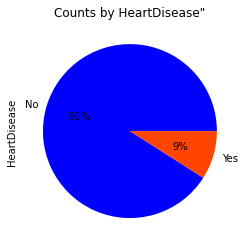

In [20]:
# Count HeartDisease value
df['HeartDisease'].value_counts().plot(kind='pie', 
                                       autopct='%1.0f%%', 
                                       colors=color,
                                       title='Counts by HeartDisease"'
                                      )

The data is not balanced. For our target 'HeartDisease', only 9% of data is 'Yes'. Because the dataset is a very large but has many data for people without heart disease, before I move on to build the prediction model, I will oversample the data to make it more balanced. I will performe oversampling in my data preprocessing step.

In [21]:
# Create list of categorical columns with HeartDisease excluded

cols=['Smoking', 'AlcoholDrinking', 'Stroke',
      'DiffWalking', 'Sex', 'AgeCategory',
      'Race', 'Diabetic', 'PhysicalActivity', 
      'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

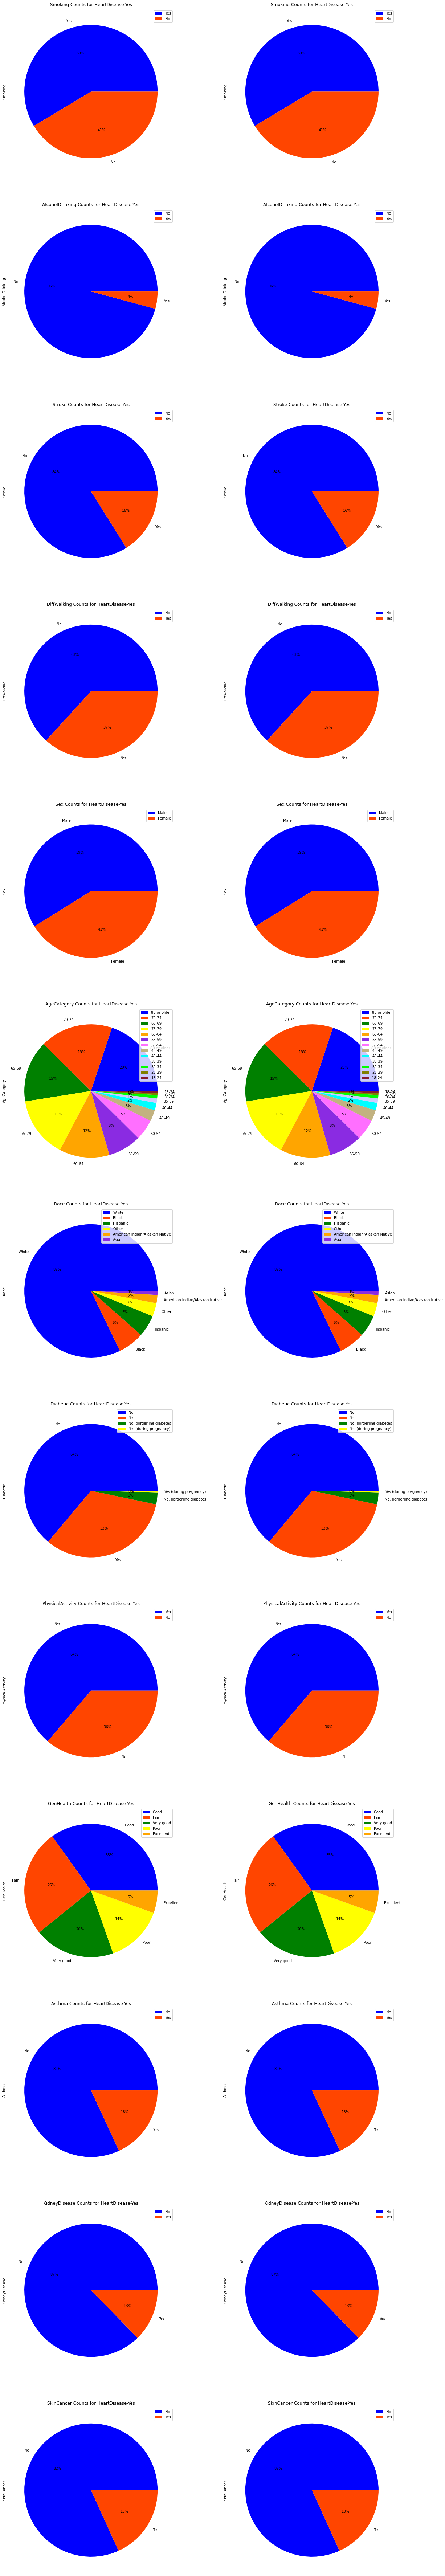

In [22]:
hd_yes=df[df.HeartDisease=='Yes']
hd_no=df[df.HeartDisease=='No']

# Plot pie chart for value count of each categorical features for HeartDisease Yes and HeartDisease No separately.

fig, axs = plt.subplots(figsize=(20,130))

def draw_pie(col, data, title,n):
    plt.subplot(13,2,n)
    data[col].value_counts().plot(kind='pie',
                                  autopct='%1.0f%%',
                                  colors=color,
                                  title=title,
                                  legend=True,
                                 )


n=0
for i in enumerate(cols):
    n=n+1
    title1=f"{i[1]} Counts for HeartDisease-Yes"
    draw_pie(i[1],hd_yes[cols],title1,n)
    n=n+1
    draw_pie(i[1],hd_yes[cols],title1,n)

plt.show()

The data is not balanced. For our target 'HeartDisease', only 9% of data is 'Yes'. Because the dataset is a very large but has many data for people without heart disease, before I move on to build the prediction model, I will oversample the data to make it more balanced. I will performe oversampling in my data preprocessing step.

### <span style="color:blue">Summary of findings for categorical features</span>

***AlcoholDrinking:***
    
    - Compared to feature 'Smoking', the feature 'AlcoholDrinking' has even higher impact to heart disease. We can see in cases with heart disease, 95.8% cases are alcohol drinking. In contrast, in cases without heart disease, only 7.45% cases are alcolhol drinking. For prediction of heart disease, 'AlcoholDrinking' is most important variable than smoking.

***Stroke,Asthma, KidneyDisease, and SkinCancer:***
    
    - These 4 features also have very strong impact to heart disease. In cases with heart disease, we can see 81% ~ 90% cases are also with these types of diseases. In cases without heart disease, 86%~97% cases are negative with these 4 features. These 4 types of diseases have secondary importance in terms of impact to prediction of heart disease.

***AgeCatgory***
    
    - AgeCategory also has strong impact to our target HeartDisease. We can see in cases with heart disease, 79.5% respondents are older than 60 years old. In cases without heart disease, it is 42.44% respondents older than 60 years old.

***DiffWalking, Diabetic, PhysicalActivity:***
    
    - These featuers also have signicant impact to heart disease. But compared to the features mentioned above, the impact is less strong. In cases with heart disease, around 64% cases have these types of healthy issues. In cases without heart disease, 77.6%~87.5% do not these types of health issues. 

***Smoking, Sex:*** 
    
    - We can see these 2 features have impact to heart disease. But the signicance is rather weaker. In cases with heart disease, we can see the smoking has a bit higher ratio 58.6% than non-smoking 41.4%. This is consistent with what we can see in cases without heart disease where the smoking has a bit lower ratio 40.6%  than non-smoking 59.4%. The feature Sex is similar to Smoking. We can see male has more chance to get HearDisease than female. But the impact to heart disease is not strong like the features mentioned in the top 3 bullets.

***Race:***
    
    - White people have highest ratio of getting heart disease among all races. White people without heart disease also got highest ratio. I suspect this is likely due to the most of respondents are white people. Therefore, we cannot determine whether the race is or is not a factor for determining people getting heart disease or not. 
    
***GenHealth:***

    - In cases without heart disease, only 12.71% respondents answered their general health is poor or fair. This is not consistent with what we see from cases with heart disease where only 40% (less than 50%) respondents answered their general health is either poor or fair. This means worse general health would not necessary lead result of people having more chance to get heart disease. 
    
    

### Numeric Features

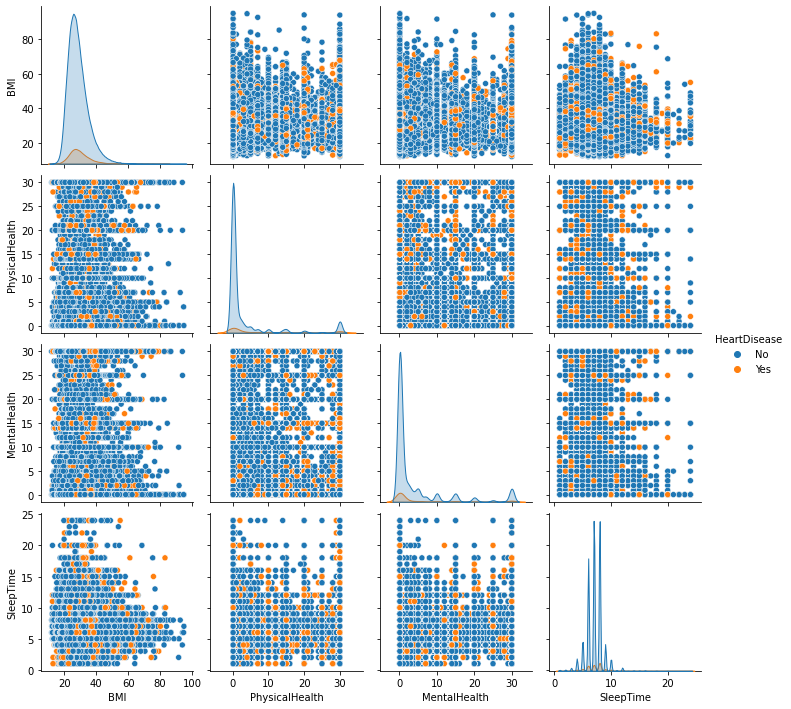

In [23]:
#Visualize numeric features vs. HeartDisease using pairplot
cols=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','HeartDisease']
# sns.pairplot(df[cols], hue='HeartDisease', palette="Accent")
sns.pairplot(df, hue = 'HeartDisease',diag_kind = 'kde', kind = 'scatter')

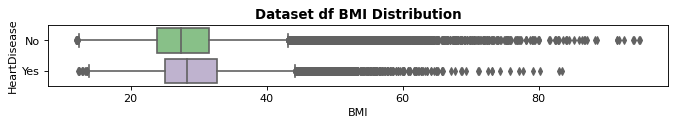

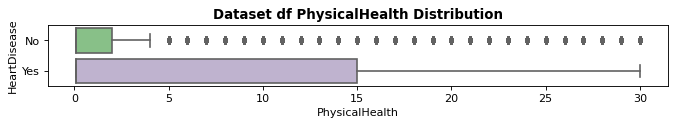

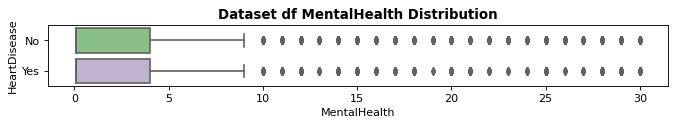

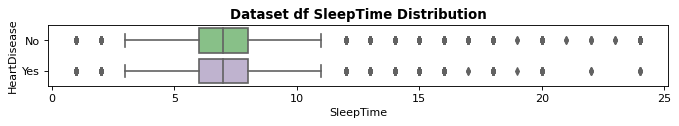

In [24]:
# sns.set_theme(style="whitegrid")
# Visualize numeric features vs. HeartDisease using boxplot
for i in range(0,len(cols_num)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df[cols_num[i]], y=df['HeartDisease'], data=df, orient="h", palette="Accent")
    plt.title("Dataset df "+ cols_num[i] + " Distribution", fontweight='bold')
    plt.show()

### <span style="color:blue">Summary of findings for numeric features</span>

The boxplots show there are no significant differences between people with and without heart disease in BMI, sleep time and mental health. But there is distinct distribution in physical health between people with and without heart disease. Further correlation analysis will be conducted to evaluate the relationship of heart disease and these features.

### Correlation

In [25]:
# convert each categorical features to be numeric

df_=df.copy()

df_['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df_['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df_['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df_['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df_['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df_['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df_['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df_['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df_['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df_['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df_['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df_['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df_['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df_['GenHealth'].replace({'Excellent':5,'Very good':4,'Good':3,'Fair':2,'Poor':1}, inplace=True)
df_.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.1,0.1,0,1,12,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.1,0.1,0,1,11,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.1,1,1,4,0,0,1,4,8.0,0,0,0


In [26]:
# Calculate correlation among all features

correlation = np.round(df_.corr(),2)
print(correlation['HeartDisease'])

HeartDisease        1.00
BMI                 0.05
Smoking             0.10
AlcoholDrinking    -0.04
Stroke              0.19
PhysicalHealth      0.17
MentalHealth        0.02
DiffWalking         0.20
Sex                -0.07
AgeCategory         0.24
Race               -0.03
Diabetic            0.17
PhysicalActivity   -0.09
GenHealth          -0.24
SleepTime           0.01
Asthma              0.04
KidneyDisease       0.14
SkinCancer          0.09
Name: HeartDisease, dtype: float64


In [27]:
hd_corr=correlation['HeartDisease'].to_frame(name='corr_heartdisease')
hd_corr=hd_corr.drop(labels='HeartDisease', axis=0)
hd_corr.reset_index(inplace=True)
hd_corr.rename(columns={'index':'Variables'}, inplace=True)
hd_corr

,Variables,corr_heartdisease
0,BMI,0.05
1,Smoking,0.10
2,AlcoholDrinking,-0.04
3,Stroke,0.19
4,PhysicalHealth,0.17
5,MentalHealth,0.02
6,DiffWalking,0.20
7,Sex,-0.07
8,AgeCategory,0.24
9,Race,-0.03


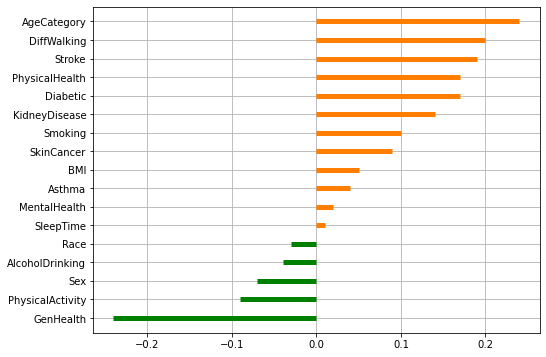

In [28]:
# plot correlation values using line plot

for i in range(len(correlation)):
    # Set color of bar to orange if corr is < 0 and green otherwise
    hd_corr['colors'] = ['#008000' if float(x) <= 0 else '#ff7e00' for x in hd_corr['corr_heartdisease']]

hd_corr = hd_corr.sort_values(ascending=True, by=['corr_heartdisease']) 

plt.figure(figsize=(8,6))

plt.hlines(y=hd_corr.Variables, xmin=0, xmax=hd_corr.corr_heartdisease, color=hd_corr.colors,  linewidth=5)

plt.grid()
plt.show()

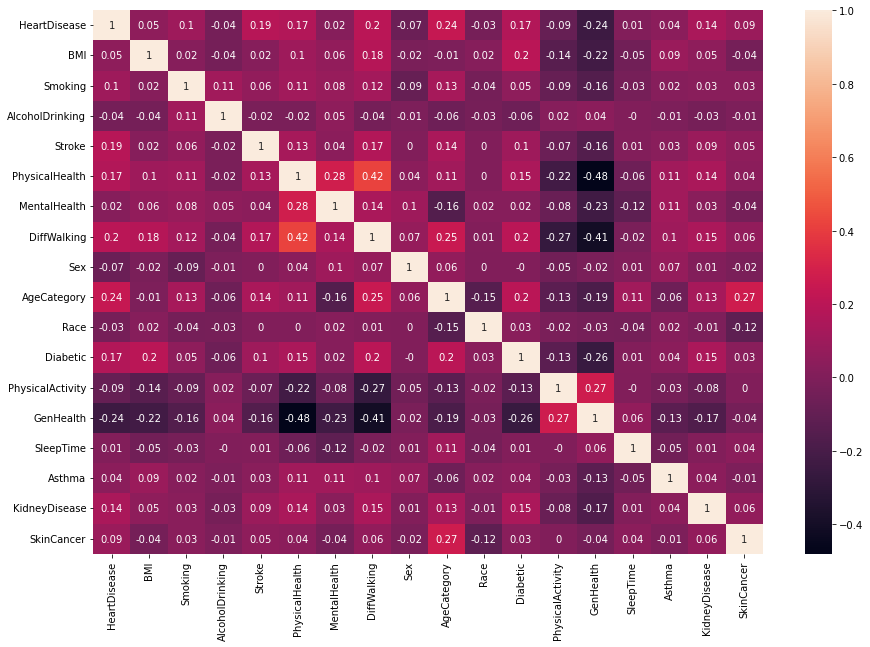

In [29]:
# Plot Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(np.round(df_.corr(),2),annot=True)
plt.show()

The correlation between target 'HeartDisease' and other features look all weak. The highest corr score is 0.24 for relation between HeartDisease and AgeCategory and -0.24 for relation between HeartDisease and GenHealth.

# Data Preprocessing

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Data Sampling and Oversampling

In [31]:
df_0 = df_[df_['HeartDisease'] == 0]
df_1 = df_[df_['HeartDisease'] == 1]

df_0 = df_0.sample(len(df_1),replace=True)
df_small = pd.concat([df_0, df_1], axis=0)
df_small = df_small.sample(10000, replace=True)
print(df_small['HeartDisease'].value_counts())

1    5005
0    4995
Name: HeartDisease, dtype: int64


In [32]:
X_=df_small.drop(['HeartDisease'],axis=1)
y=df_small[['HeartDisease']]
print(X_.head(),'\n')
print(y.head())

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
72481   22.87        1                0       1            15.0           3.0   
207479  24.94        0                0       0             0.1          20.0   
279038  34.44        1                0       0             0.1           0.1   
296748  31.93        0                0       0             0.1           0.1   
184160  24.56        0                0       0            30.0           6.0   

        DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  \
72481             0    1            3     0         0                 1   
207479            0    1            6     0         0                 1   
279038            0    0            7     0         1                 0   
296748            0    0            6     0         0                 1   
184160            1    0            2     0         0                 0   

        GenHealth  SleepTime  Asthma  KidneyDisease  SkinCance

In [33]:
X_cols = [x for x in df_small.columns if x != 'HeartDisease']
X_cols

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

### Data Scaling
Use MinMaxScaler to scale `X`.

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_)

### Data Spliting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=72018)

# Modeling

### <span style="color:blue">Summary of training at least three different classifier models:</span>
- The feature 'HeartDisease' will be our target for prediction.
- The classifiers we are going to apply for training include :
    - RandomForestClassifier
    - LogisticRegression
    - AdaBoostClassifier
    - GradientBoostingClassifier
- We are going to use GridSearch with cross validation to find the best hyper prameters for building the models
- We will calculate and compare the performance of each model and plot it with Confusion Matrix and RocCureDisplay 

In [36]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, make_scorer, roc_curve, roc_auc_score, mean_squared_error

### Get Best Estimators

In [37]:
# Name list for models to be used
models_name = ['RandomForestClassifier','LogisticRegression', 'AdaBoostClassifier', 'GradientBoostingClassifier']

In [38]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [39]:
# Define values of parameters to be evaluated by GridSearchCV
n_trees = [50, 100, 150, 200, 300, 400, 500]
m_depth = [6, 7, 8, 10, 15, 20, 25]
learn_rate = [1.0, 0.8, 0.5, 0.1, 0.01, 0.001, 0.0001]

In [40]:
# Define function to get best accuracy of prediction:
# 1. obtain best hyper parameters using GridSearchCV
# 2. Train the model using the best estimator
# 3. return prediction

def get_best_estimator(model_name, model, X_train, y_train, params, kf):
    grid = GridSearchCV(model, params, cv=kf, scoring='accuracy')
    grid.fit(X_train, y_train)
    pred=grid.best_estimator_.predict(X_test)
    
    if (model_name=='RandomForestClassifier') | (model_name=='AdaBoostClassifier'):
        feature_imp = pd.Series(grid.best_estimator_.feature_importances_, index=X_cols).sort_values(ascending=False)
    else:
        feature_imp='NaN'
    
    return(pred, feature_imp)

In [41]:
# Define function to plot confusion matrix
# Insert value into string https://matthew-brett.github.io/teaching/string_formatting.html

def plot_confusion(model_name, ypred):
    cm= confusion_matrix(y_test, ypred)
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

    #Display the visualization of the Confusion Matrix.
    plt.show()

In [42]:
# 1. Define hyper parameters and classifier as input for GridSeachCV
# 2. Run function get_best_estimator to get most accurate prediction
# 3. With the given prediction, calculate metrics
# 4. Store prediction and metrics in a dataframe

column_names_scores = ['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score']
scores_df = pd.DataFrame(columns = column_names_scores)
column_names_res = ['model_name', 'prediction', 'feature_importance']
res_df = pd.DataFrame(columns = column_names_res)

for m in models_name:
    if m=='LogisticRegression':
        params = {
                    'C': np.power(10.0, np.arange(-10, 10)),
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                  }
        model = LogisticRegression(solver='saga', random_state=72018, n_jobs=-1)
    
    if m=='RandomForestClassifier':
        params = {
                    'n_estimators': n_trees,
                    'max_depth' : m_depth
                 }
        model = RandomForestClassifier(random_state=72018, n_jobs=-1)
        
    if m=='AdaBoostClassifier':
        params = {
                    'n_estimators': n_trees,
                    'learning_rate': learn_rate
                 }
        model = AdaBoostClassifier(random_state=72018)
        
    if m == 'GradientBoostingClassifier':
        params = {
                    'n_estimators': n_trees,
                    'learning_rate': learn_rate
                 }
        model = GradientBoostingClassifier(random_state=72018)

    y_pred, f_imp  = get_best_estimator(m, model, X_train, y_train, params, kf)
    
    # Calculate metrics
    res_scores = {
            'model_name': m,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'roc_auc_score': roc_auc_score(y_test, y_pred)
          }
    res = {
            'model_name': m,
            'prediction': y_pred,
            'feature_importance': f_imp
          }
    scores_df = scores_df.append(res_scores, ignore_index=True)
    res_df = res_df.append(res, ignore_index=True)

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Compare models

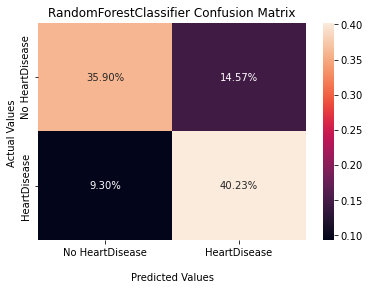

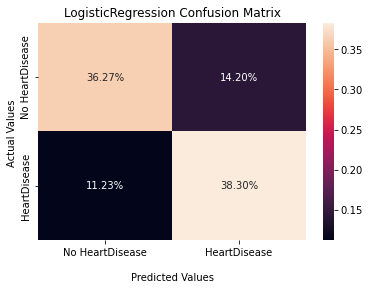

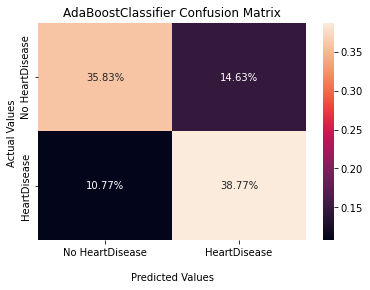

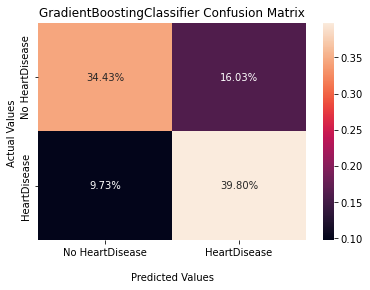

In [43]:
# Plot Confusion Matrix
for m in models_name:
    p=res_df[res_df.model_name==m]
    plot_confusion(m, p.iloc[0,1])

In [44]:
# n_neigh = [x for x in range(1,41)]

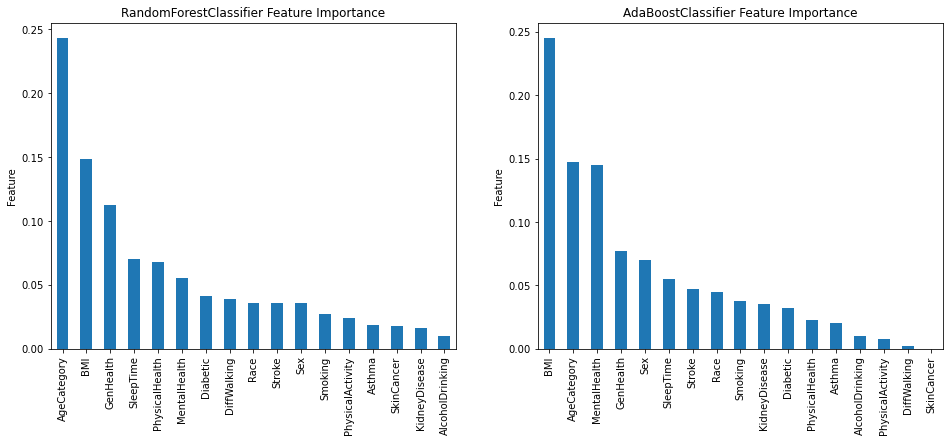

In [45]:
# Plot Feature Importance
i=0
for m in models_name:
    if (m=='RandomForestClassifier') | (m=='AdaBoostClassifier'):
        i=i+1
        plt.subplot(1,2,i)
        p=res_df[res_df.model_name==m]
        imp = pd.Series(p.iloc[0,2], index=X_cols).sort_values(ascending=False)
        ax = imp.plot(kind='bar', figsize=(16, 6))
        ax.set_title(f"{m} Feature Importance")
        ax.set(ylabel='Relative Importance')
        ax.set(ylabel='Feature')
plt.show()      

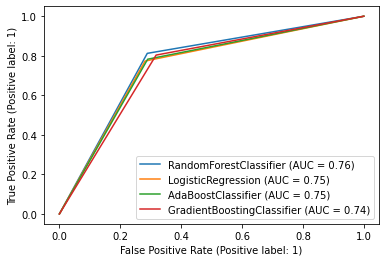

In [46]:
# Plot RocCurve
ax = plt.gca()
for m in models_name:
    p=res_df[res_df.model_name==m]
    RocCurveDisplay.from_predictions(y_test, p.iloc[0,1], name=m, ax=ax)

plt.show()

In [47]:
# Display metrics scores
scores_df

,model_name,accuracy,precision,recall,f1_score,roc_auc_score
0,RandomForestClassifier,0.761333,0.734185,0.812248,0.771246,0.761804
1,LogisticRegression,0.745667,0.729524,0.773217,0.750735,0.745921
2,AdaBoostClassifier,0.746000,0.725968,0.782638,0.753238,0.746339
3,GradientBoostingClassifier,0.742333,0.712836,0.803499,0.755457,0.742899


# Conclusion and Suggestion

### <span style="color:blue">Model Recommended</span>
According to the evaluation, **RandomForestClassifier is recommended.** As it has highest score in every metric, although the metrics difference among the 4 models in current analysis is really so small. 

### <span style="color:blue">Suggestions for Next Steps</span>
From EDA in current analysis, we found that these features AlcoholDrinking, Stroke,Asthma, KidneyDisease and SkinCancer have strongest impact to our target 'HeartDisease'. 

We also found that the feature AgeCategory also has strong impact to the target, but not that strong as the the features mentioned above.

However, when we look at the chart for feature importance resulted from the 2 classifiers 'RandomForestClassifier' and 'AdaBoostClassifier', we can see the results is conflict with our findings in EDA. For example, in case of RandomForestClassifier, AlcoholDrinking is the least importance and Asthma, KidneyDisease and SkinCancer have the importance 2nd from the last. SkinCancer have zero important in model of AdaBoostClassifier.

Because the data set is imbalanced and so huge, before we proceed to build the prediction modes, we had oversampled the data firstly and then we took only 10000 samples out of the oversampled dataset for train and test the models. Could it be possible that the oversampling has led some negative impact to prediction? I would be interested in analyze the data further to find answer for this. For next step, I think I can try to test same algorithms against the original dataset to see what makes difference from current analysis. I would also like to try more other Classifiers to see if they can work better than what I have experimented in current analysis.